In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/oam_pheno/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [7]:
# make data for FB contour plot

pT_values = np.linspace(0.1, 10, 100)

dq = 0.05/np.sqrt(3/(2*np.pi))
nsteps = round(np.log(100)/dq)
qs = np.linspace(0, np.log(100), nsteps)
Q_values = np.sqrt(np.exp(qs))

fb_kins = dijet.Kinematics(z=0.4, x=0.001)

pT_grid = np.zeros((100, nsteps))
Q_grid = np.zeros((100, nsteps))

dj = dijet.DIJET(constrained_moments=True, fit_type='pp')

fb_values = {}
amps = ['N', 'Qu', 'Qd', 'Qs', 'G2', 'I3u', 'I3d', 'I3s', 'I4', 'I5']
for amp in amps: fb_values[amp] = np.zeros((100, nsteps))

for i, pT in enumerate(pT_values):
    for j, Q in enumerate(Q_values):

        pT_grid[i,j] = pT
        Q_grid[i,j] = Q*np.sqrt(0.4*(1-0.4))

        fb_kins.pT = pT
        fb_kins.Q = Q
        fb_kins.x = 0.01

        for amp in amps:
            # fb_values[amp][i,j] = np.log(np.abs(dj.fourier_bessel(fb_kins, [[1,1,0,0]], amp)))
            fb_values[amp][i,j] = dj.fourier_bessel(fb_kins, [[1,1,0,0]], amp)
        

--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1


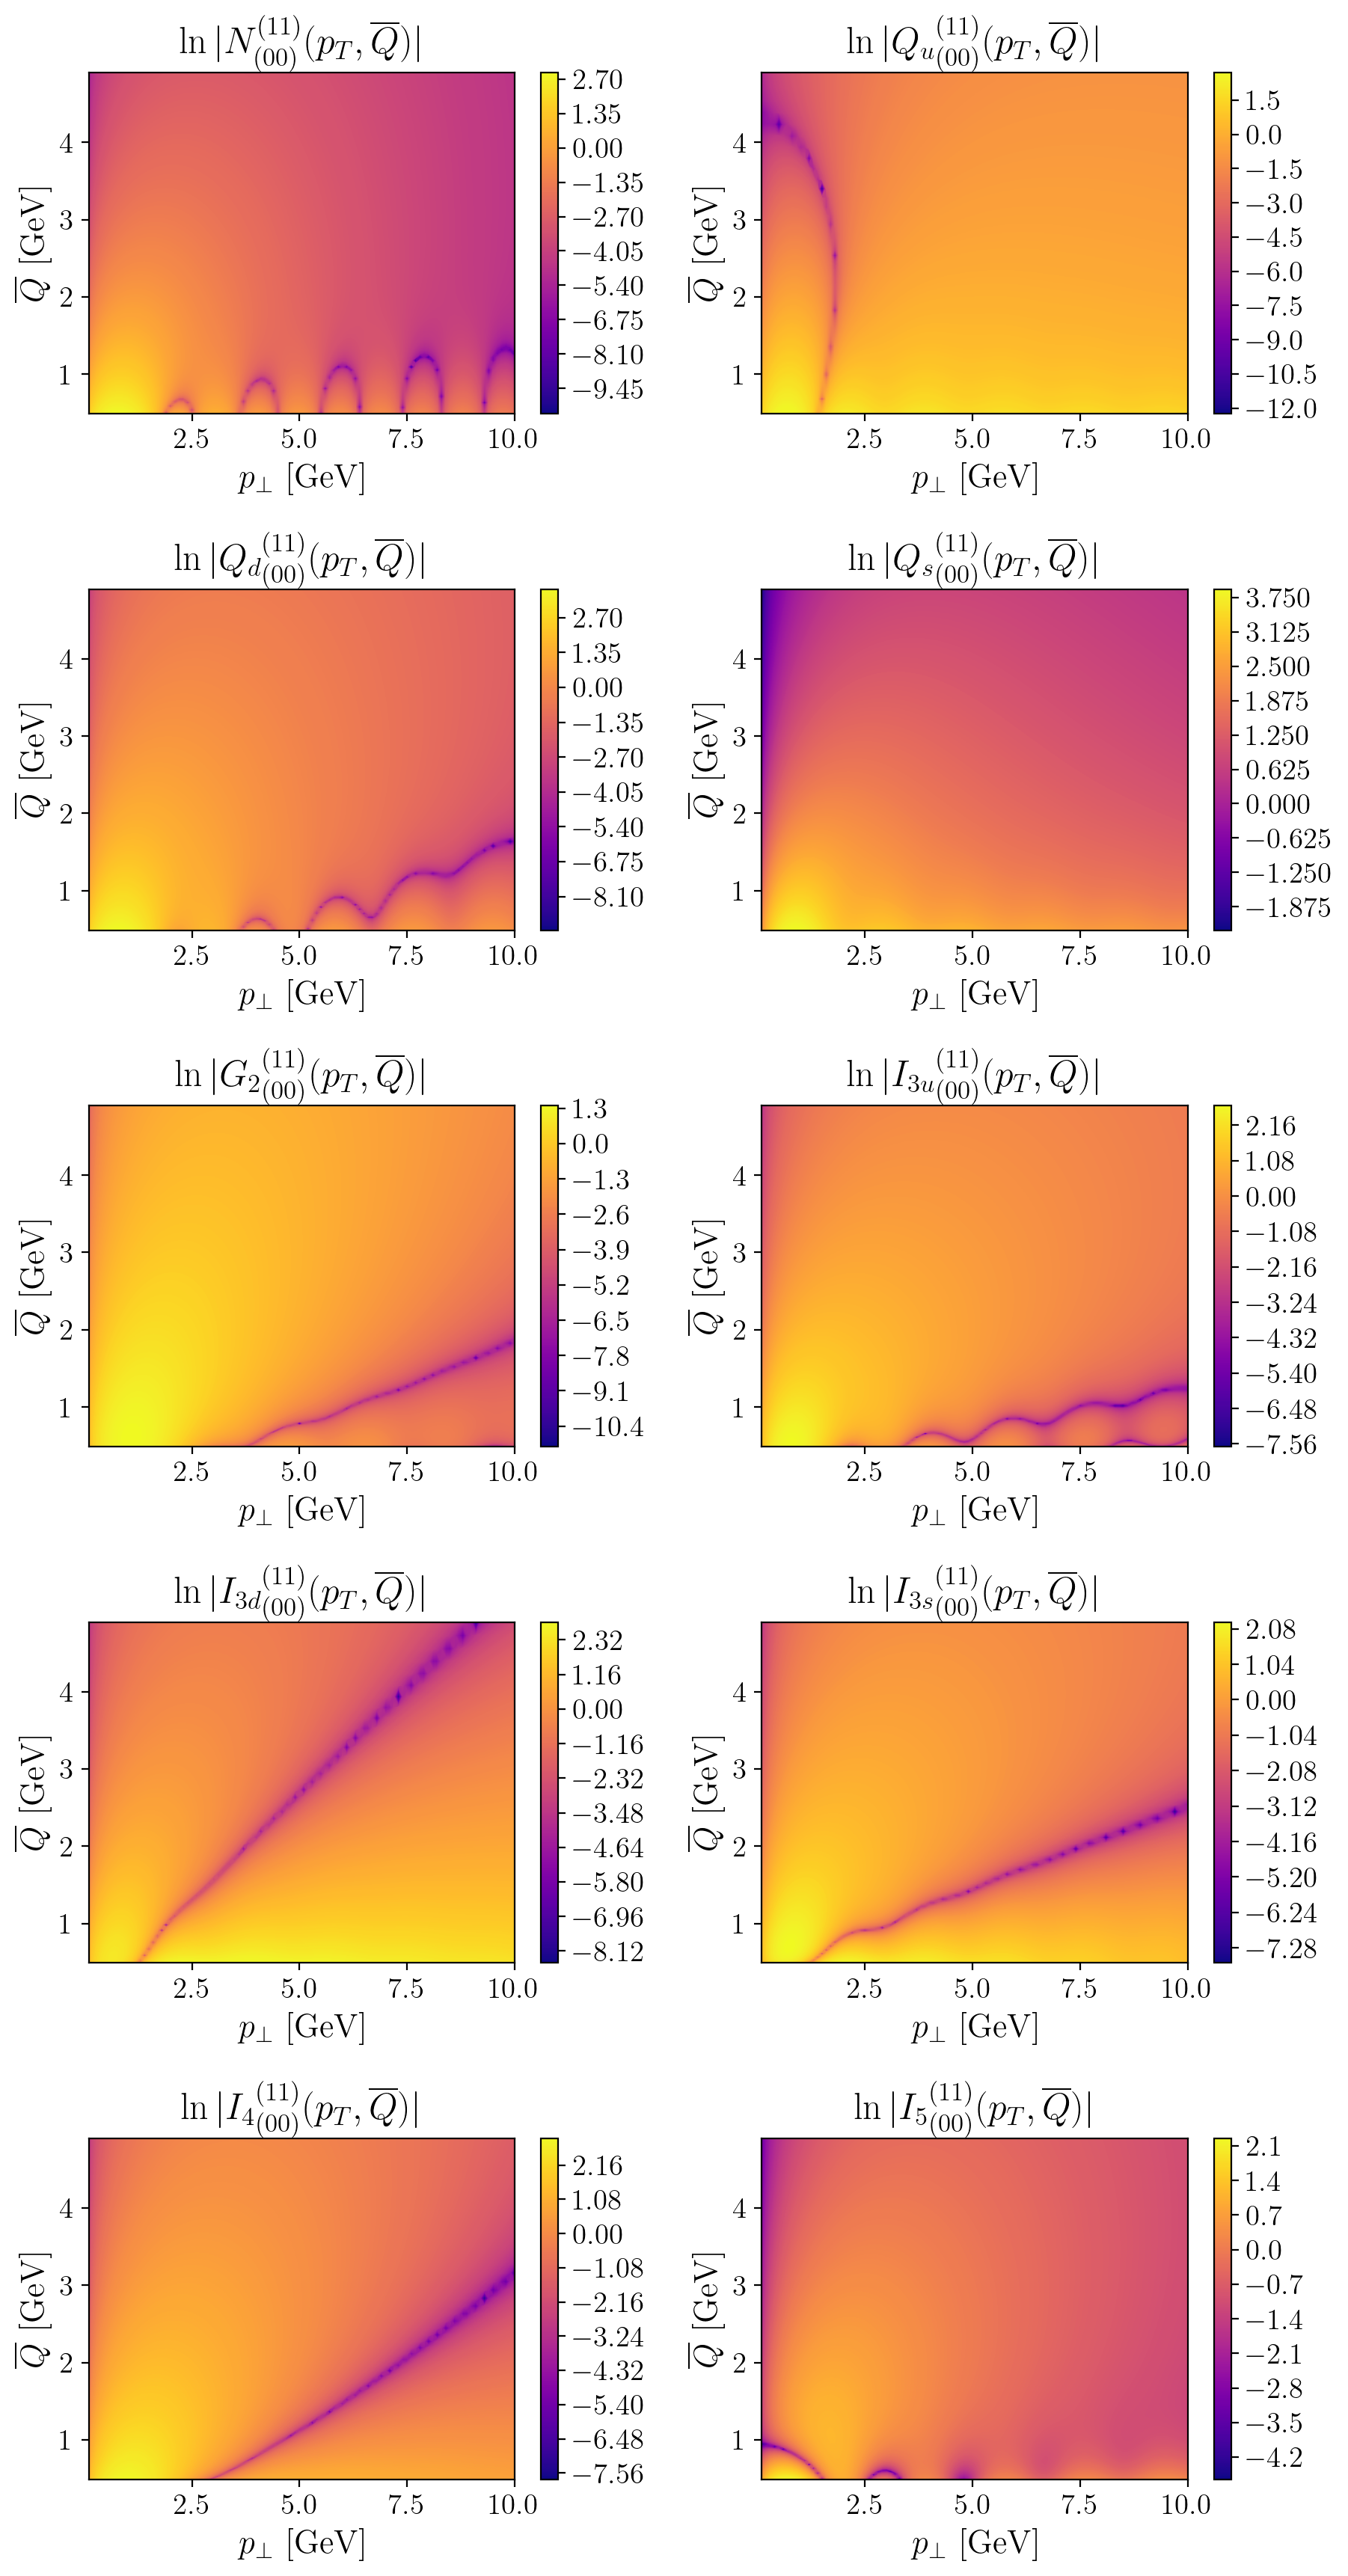

In [9]:
# make fb contour plot
asp_ratio = 4/3
psize = 3.5
nrows, ncols = 5,2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))
axs = [(i,j) for i in range(nrows) for j in range(ncols)]

amp_strs = {
    'N': 'N',
    'Qu': 'Q_u', 'Qd': 'Q_d', 'Qs':'Q_s', 'G2':'G_2', 'I3u':'I_{{3u}}', 
    'I3d':'I_{{3d}}', 'I3s':'I_{{3s}}', 'I4':'I_{{4}}', 'I5':'I_{{5}}'
    }
for ia, amp in enumerate(amps):
    contour = ax[axs[ia]].contourf(pT_grid, Q_grid, np.log(np.abs(fb_values[amp])), levels=300, cmap='plasma') 
    cbar = fig.colorbar(contour, ax=ax[axs[ia]])
    ax[axs[ia]].set_xlabel(r'$p_\perp \,\,[\mathrm{GeV}]$')
    ax[axs[ia]].set_ylabel(r'$\overline{Q} \,\,[\mathrm{GeV}]$')
    ax[axs[ia]].set_title(fr'$\ln|{{{amp_strs[amp]}}}^{{(11)}}_{{(00)}} (p_T, \overline{{Q}})|$')

# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()

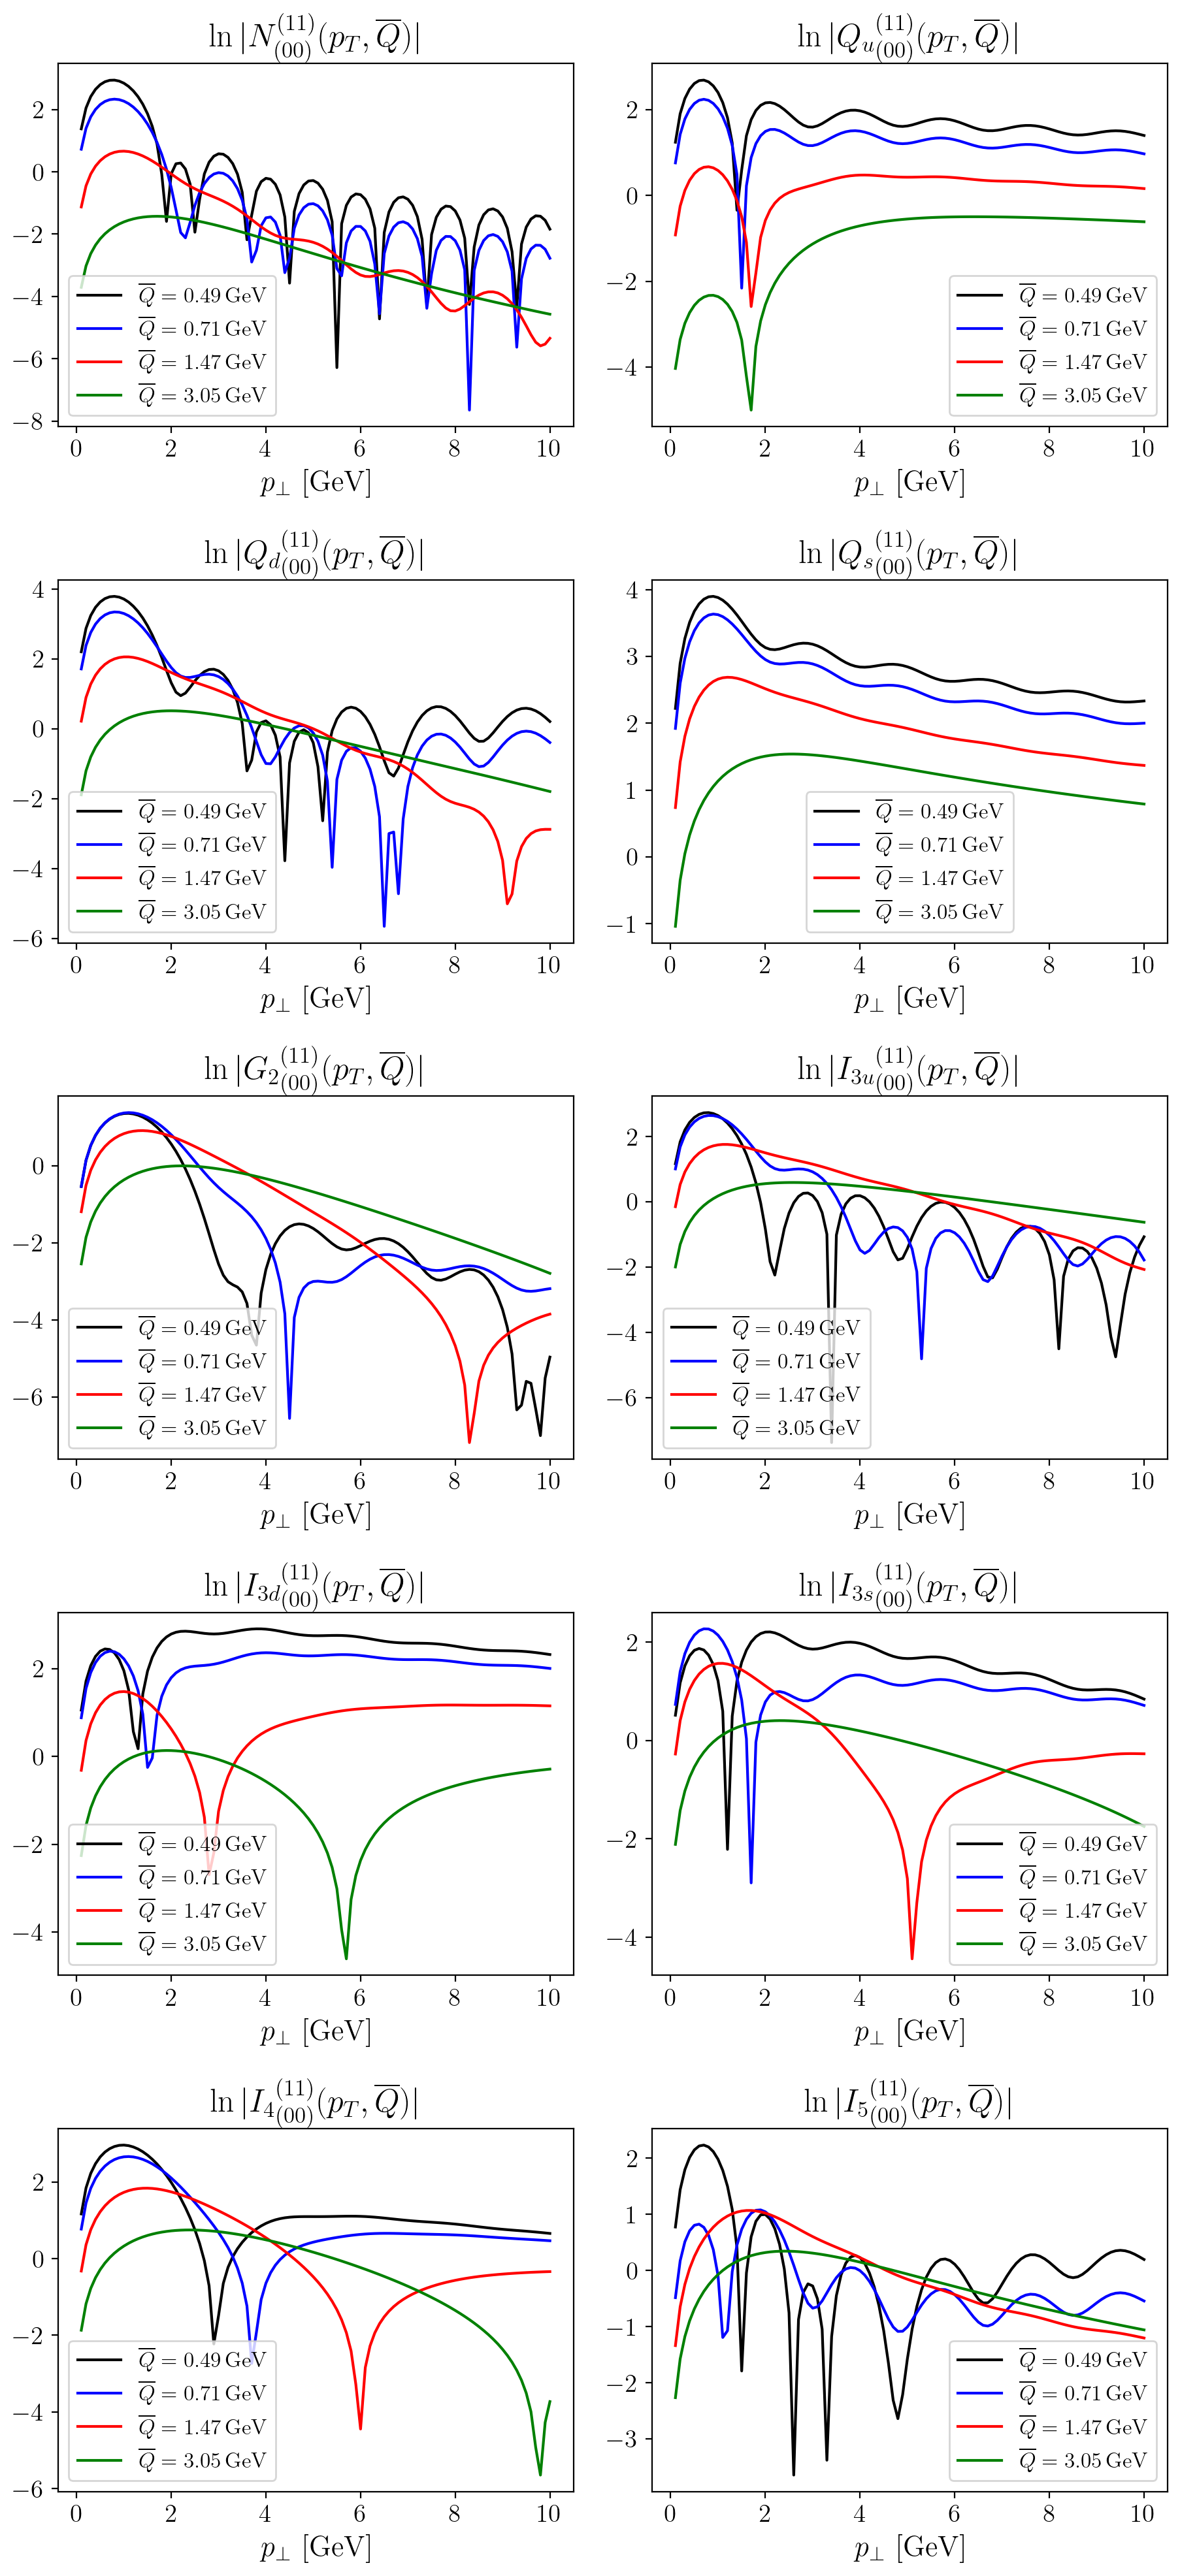

In [15]:
# make fb slice plots
asp_ratio = 3.5/3
psize = 4
nrows, ncols = 5,2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))
axs = [(i,j) for i in range(nrows) for j in range(ncols)]
amp_strs = {
    'N': 'N',
    'Qu': 'Q_u', 'Qd': 'Q_d', 'Qs':'Q_s', 'G2':'G_2', 'I3u':'I_{{3u}}', 
    'I3d':'I_{{3d}}', 'I3s':'I_{{3s}}', 'I4':'I_{{4}}', 'I5':'I_{{5}}'
    }
colors = ['black', 'blue', 'red', 'green']
for iamp, amp in enumerate(amps):
    for iQ, j in enumerate([0,10,30,50]):
        ax[axs[iamp]].plot(pT_grid[:,0], np.log(np.abs(fb_values[amp][:,j])), color=colors[iQ], label=rf'$\overline Q =  {round(Q_grid[0,j], 2)} \, \mathrm{{GeV}}$') 

    ax[axs[iamp]].set_xlabel(r'$p_\perp \,\,[\mathrm{GeV}]$')
    ax[axs[iamp]].set_title(fr'$\ln|{{{amp_strs[amp]}}}^{{(11)}}_{{(00)}} (p_T, \overline{{Q}})|$')
    ax[axs[iamp]].legend()
    
# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()

In [16]:
# compare IR regulating functions

kins = dijet.Kinematics(z=0.4, x=0.001)

dq = 0.05/np.sqrt(3/(2*np.pi))
nsteps = round(np.log(100)/dq)
qs = np.linspace(0, np.log(100), nsteps)
Qs = np.sqrt(np.exp(qs))

pTs = np.linspace(1, 10, 100)

xis = [0, 0.1, 0.2, 0.5]
djs = {}
for xi in xis:
    if xi==0: method=None
    else: method='gauss'
    djs[xi] = dijet.DIJET(fit_type='pp', constrained_moments=True, IR_reg=[method,xi], lambdaIR=0.3)

fbs = {}
for xi in xis:
    fbs[xi] = {}
    for amp in ['Qu', 'N']:
        fbs[xi][amp] = np.zeros((len(pTs), len(Qs)))

        for ipT, pT in enumerate(pTs):
            for iQ, Q in enumerate(Qs):
                kins.pT = pT
                kins.Q = Q
                fbs[xi][amp][ipT, iQ] = djs[xi].fourier_bessel(kins, [[1,1,0,0]], amp)


--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded un

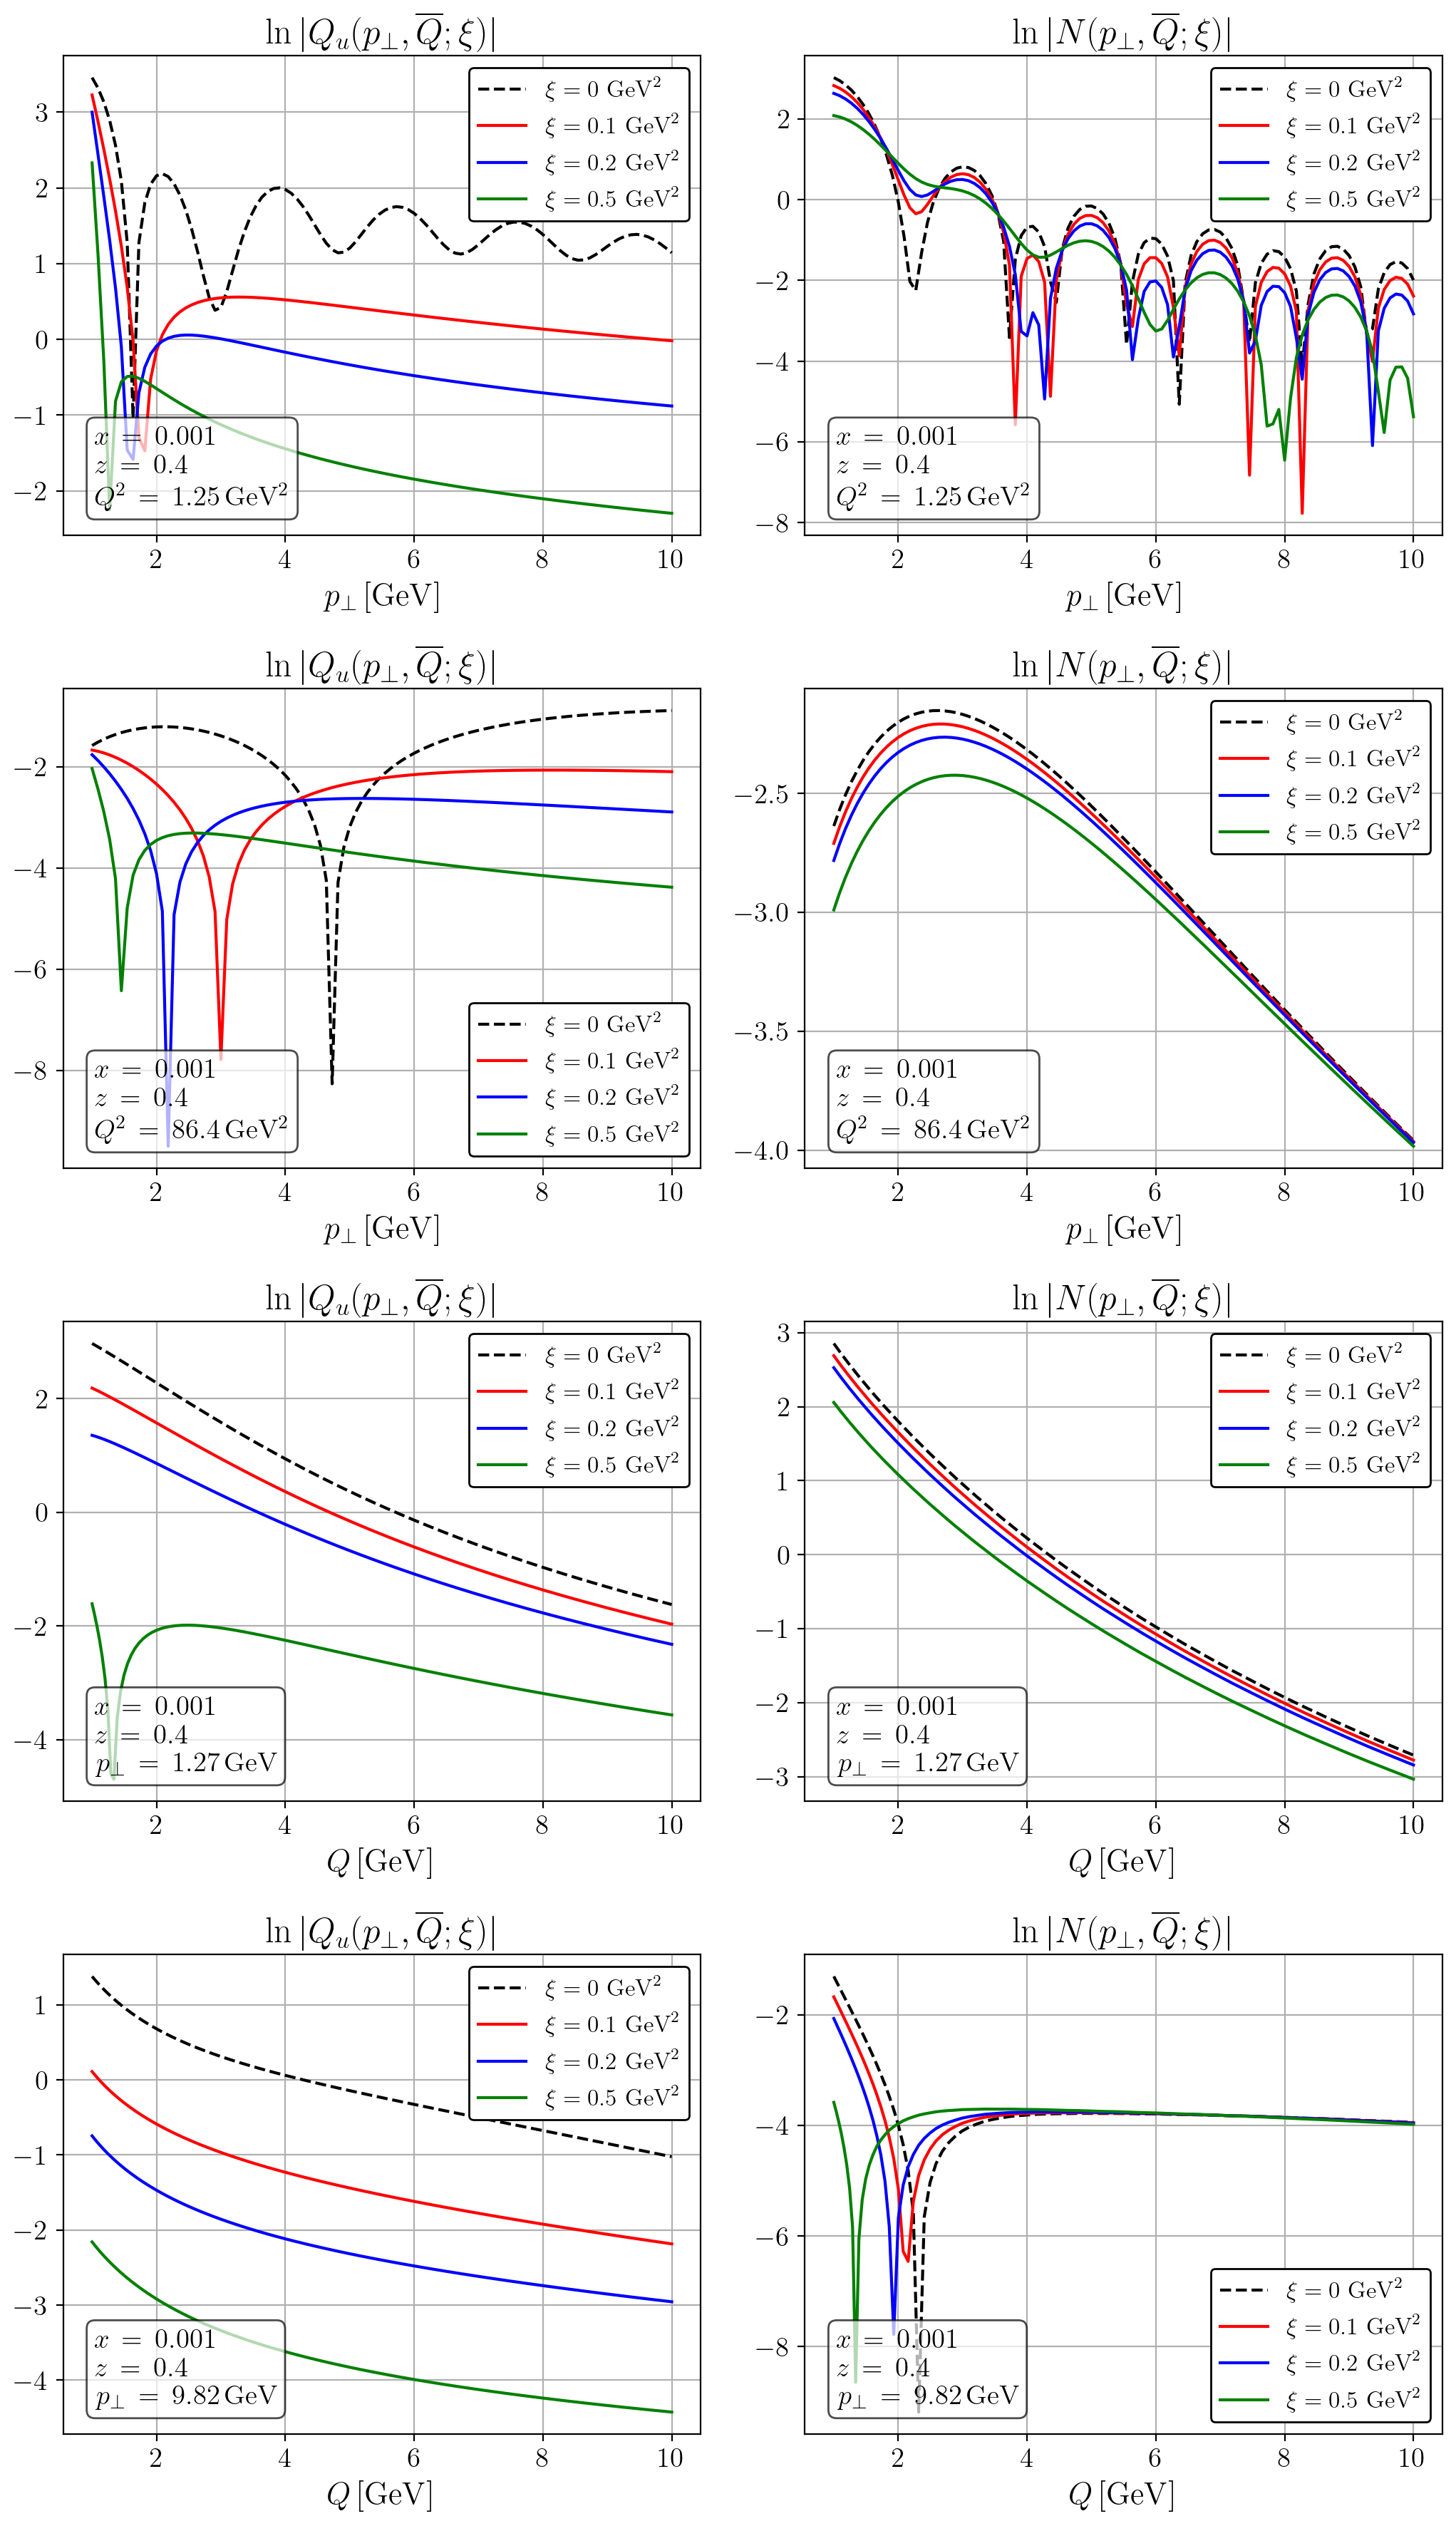

In [17]:
# make kinematics text
lvar = ['lowQ', 'highQ','lowpT','highpT']
info_text = {var: '' for var in lvar}

iv = 3
for var in lvar:
    if 'low' in var: i = iv
    else: i = -iv
        
    info_text[var] = fr'$x \, = \,{round(kins.x, 3)}$' + '\n'
    info_text[var] += fr'$z \, = \,{round(kins.z, 3)}$' + '\n'
    if 'Q' in var:
        info_text[var] += fr'$Q^2 \, = \,{round(Qs[i]**2, 2)}\, \mathrm{{GeV^2}}$'
    else:
        info_text[var] += fr'$p_\perp \, = \,{round(pTs[i], 2)}\, \mathrm{{GeV}}$'


# IR regulator plots
asp_ratio = 3.5/3
psize = 4.5
nrows, ncols = 4, 2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

colors = ['black', 'red', 'blue', 'green', 'orange', 'black']
linestyles = ['--', '-', '-', '-', '-']

for ixi, xi in enumerate(xis):
    for ivar, var in enumerate(lvar):
        for iamp, amp in enumerate(['Qu', 'N']):
            if var == 'lowQ':
                x_values = pTs
                y_values = fbs[xi][amp][:, iv]
            elif var == 'highQ':
                x_values = pTs
                y_values = fbs[xi][amp][:, -iv]
            elif var == 'lowpT':
                x_values = Qs
                y_values = fbs[xi][amp][iv]
            elif var == 'highpT':
                x_values = Qs
                y_values = fbs[xi][amp][-iv]
                
            ax[ivar, iamp].plot(x_values, np.log(np.abs(y_values)), label = fr'$\xi = {xi}\,\, \mathrm{{GeV}}^{{2}}$', color=colors[ixi], linestyle=linestyles[ixi])

for i, var in enumerate(lvar):

    if 'Q' in var: lab = 'p_\perp'
    else: lab = 'Q'
        
    ax[i, 0].set_xlabel(fr'${lab}\, [\mathrm{{GeV}}]$')
    ax[i, 0].set_title(r'$\ln| Q_u(p_\perp, \overline{Q}; \xi)|$')
    ax[i, 0].legend(frameon=True, framealpha=1.0, edgecolor='black')
    # ax[0, i].semilogx()
    ax[i, 0].text(
        0.05, 0.05, info_text[var], 
        transform=ax[i,0].transAxes,
        ha='left', va='bottom', 
        fontsize=14, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor='black')
    )
    ax[i,0].grid(True)
    
    ax[i,1].set_xlabel(fr'${lab}\, [\mathrm{{GeV}}]$')
    ax[i,1].set_title(r'$\ln| N(p_\perp, \overline{Q}; \xi)|$')
    ax[i,1].legend(frameon=True, framealpha=1.0, edgecolor='black')
    # ax[i,1].semilogx()
    ax[i,1].text(
        0.05, 0.05, info_text[var], 
        transform=ax[i,1].transAxes,
        ha='left', va='bottom', 
        fontsize=14, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor='black')
    )
    ax[i,1].grid(True)

plt.tight_layout()
plt.show()


# fig.savefig(f"IR_regs{tag}.png")



In [23]:
kins = dijet.Kinematics(pT=2.0, z=0.4, x=0.01)
dj = dijet.DIJET(fit_type='pp', constrained_moments=True, IR_reg=['gauss',0.2], lambdaIR=0.3)


ints = []

dq = 0.05/np.sqrt(3/(2*np.pi))
nsteps = round(np.log(100)/dq)
qs = np.linspace(0, np.log(100), nsteps)
Qs = np.sqrt(np.exp(qs))

for iQ, Q in enumerate(Qs):
    kins.Q = Q
    ints.append(dj.fourier_bessel(kins, [[1,1,0,0]], 'Qu'))

--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1


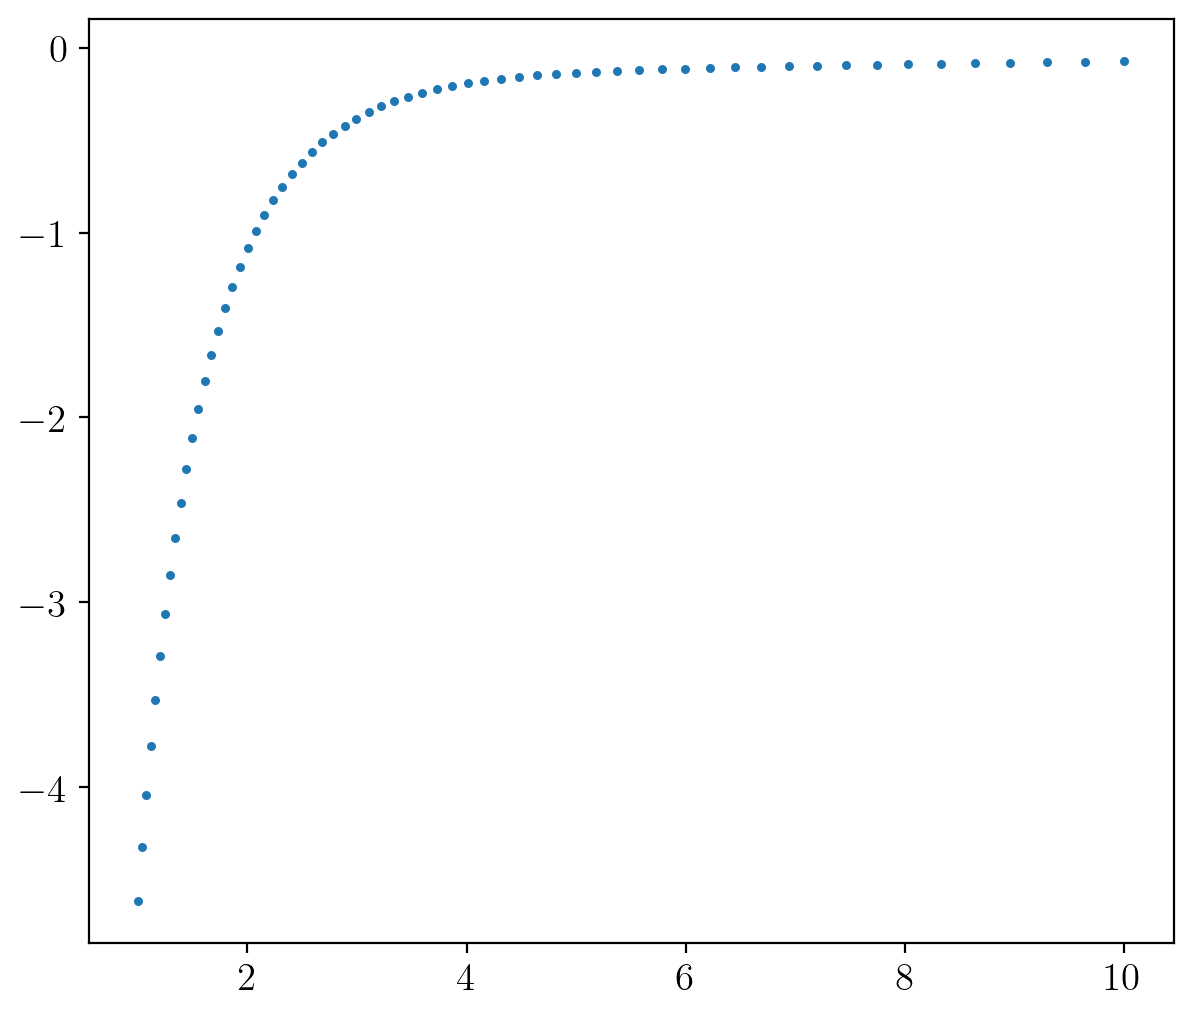

In [24]:
asp_ratio = 3.5/3
psize = 6
nrows, ncols = 1, 1
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

# for iq in range(len(Qs)):
#     ax.scatter(dj.s10_values, ints[iq], label=fr'$Q={iq+1}$',s=1)
#     print(np.sum(ints[iq]))
ax.scatter(Qs, ints, s=5)

# ax.legend()
plt.show()


In [2]:
a = [0, 3]

np.linspace(*a, 10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

In [3]:
np.arange(3,30)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])